In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yolo-coco-data/yolov3.cfg
/kaggle/input/yolo-coco-data/coco.names
/kaggle/input/yolo-coco-data/yolov3.weights
/kaggle/input/imager/cat.png
/kaggle/input/imager/image2.jpeg


In [20]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import time

# The class names are there in coco.names files.
# The pretrained weights of YOLO are there in yolov3.weights.
# And yolov3.config is the configuration file..

In [21]:
names=open("/kaggle/input/yolo-coco-data/coco.names").read()
names

'person\nbicycle\ncar\nmotorbike\naeroplane\nbus\ntrain\ntruck\nboat\ntraffic light\nfire hydrant\nstop sign\nparking meter\nbench\nbird\ncat\ndog\nhorse\nsheep\ncow\nelephant\nbear\nzebra\ngiraffe\nbackpack\numbrella\nhandbag\ntie\nsuitcase\nfrisbee\nskis\nsnowboard\nsports ball\nkite\nbaseball bat\nbaseball glove\nskateboard\nsurfboard\ntennis racket\nbottle\nwine glass\ncup\nfork\nknife\nspoon\nbowl\nbanana\napple\nsandwich\norange\nbroccoli\ncarrot\nhot dog\npizza\ndonut\ncake\nchair\nsofa\npottedplant\nbed\ndiningtable\ntoilet\ntvmonitor\nlaptop\nmouse\nremote\nkeyboard\ncell phone\nmicrowave\noven\ntoaster\nsink\nrefrigerator\nbook\nclock\nvase\nscissors\nteddy bear\nhair drier\ntoothbrush'

In [22]:
names=names.strip().split("\n")

In [23]:
print(names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [24]:
print(len(names))

80


# Now we have got the labels and we saw that the Coco dataset consists of 80 classes..

# Now defining paths to the weights and configuration file:-

In [25]:
weights_path = '/kaggle/input/yolo-coco-data/yolov3.weights'
configuration_path = '/kaggle/input/yolo-coco-data/yolov3.cfg'

pro_min = 0.5 # Setting minimum probability to eliminate weak predictions

threshold = 0.3 # Setting threshold for non maximum suppression

# Now loading YOLO Object Detector with the help of DNN(Deep Neural Network) Library:-

In [26]:
net = cv2.dnn.readNetFromDarknet(configuration_path,weights_path)

# Getting names of all layers
layers = net.getLayerNames()  # list of layers' names

# # Check point
print(layers)

['conv_0', 'bn_0', 'relu_1', 'conv_1', 'bn_1', 'relu_2', 'conv_2', 'bn_2', 'relu_3', 'conv_3', 'bn_3', 'relu_4', 'shortcut_4', 'conv_5', 'bn_5', 'relu_6', 'conv_6', 'bn_6', 'relu_7', 'conv_7', 'bn_7', 'relu_8', 'shortcut_8', 'conv_9', 'bn_9', 'relu_10', 'conv_10', 'bn_10', 'relu_11', 'shortcut_11', 'conv_12', 'bn_12', 'relu_13', 'conv_13', 'bn_13', 'relu_14', 'conv_14', 'bn_14', 'relu_15', 'shortcut_15', 'conv_16', 'bn_16', 'relu_17', 'conv_17', 'bn_17', 'relu_18', 'shortcut_18', 'conv_19', 'bn_19', 'relu_20', 'conv_20', 'bn_20', 'relu_21', 'shortcut_21', 'conv_22', 'bn_22', 'relu_23', 'conv_23', 'bn_23', 'relu_24', 'shortcut_24', 'conv_25', 'bn_25', 'relu_26', 'conv_26', 'bn_26', 'relu_27', 'shortcut_27', 'conv_28', 'bn_28', 'relu_29', 'conv_29', 'bn_29', 'relu_30', 'shortcut_30', 'conv_31', 'bn_31', 'relu_32', 'conv_32', 'bn_32', 'relu_33', 'shortcut_33', 'conv_34', 'bn_34', 'relu_35', 'conv_35', 'bn_35', 'relu_36', 'shortcut_36', 'conv_37', 'bn_37', 'relu_38', 'conv_38', 'bn_38', 'r

# Getting the output layers:-

In [27]:
for i in net.getUnconnectedOutLayers():
    print(layers[i[0]-1])

yolo_82
yolo_94
yolo_106


In [28]:
output_layers=[layers[i[0] - 1] for i in net.getUnconnectedOutLayers()]

print(output_layers)

['yolo_82', 'yolo_94', 'yolo_106']


# So these are the output layers..

# Reading the image for Object Detection:-

In [29]:
image=cv2.imread("/kaggle/input/imager/cat.png")
image1=cv2.imread("/kaggle/input/imager/image2.jpeg")
print(image.shape)

(453, 601, 3)


In [30]:
# print(image1.shape)

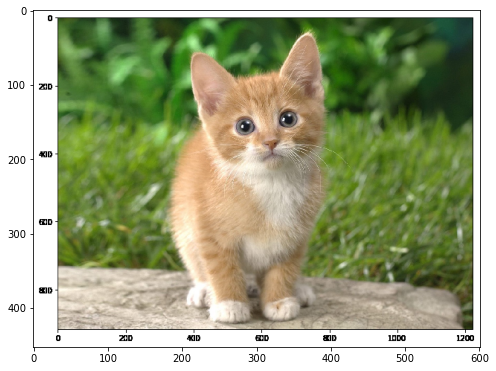

In [31]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Our Image is now loaded..

# Now getting blob from Image:-

In [32]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (400,400), swapRB=True, crop=False)
# blobfromimage returns a 4 dimensional bolb

# Check point
print(image.shape)  
print(blob.shape)  
# Resulted shape has number of images, number of channels, width and height
# So (1,3,400,400)

(453, 601, 3)
(1, 3, 400, 400)


# Transposing the blob to see the blobbed image:-

(400, 400, 3)


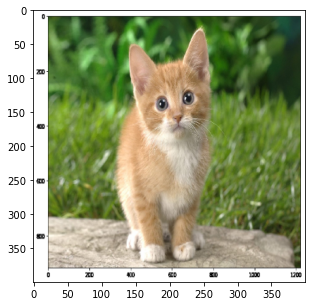

In [33]:
# Slicing blob and transposing to make channels come at the end
blob_to_show = blob[0, :, :, :].transpose(1, 2,0)
print(blob_to_show.shape) 

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.imshow(blob_to_show)
plt.show()

# Implementing forward pass with our blob and pass through the output layers..

In [34]:
print(blob.shape)

(1, 3, 400, 400)


In [36]:
net.setInput(blob) # giving blob as input to our YOLO Network.
t1=time.time()
output = net.forward(output_layers)
t2 = time.time()

# Showing spent time for forward pass
print('YOLO took {:.5f} seconds'.format(t2-t1))

error: OpenCV(4.2.0) /io/opencv/modules/dnn/src/layers/concat_layer.cpp:102: error: (-201:Incorrect size of input array) Inconsistent shape for ConcatLayer in function 'getMemoryShapes'


Important: The EAST text requires that your input image dimensions be multiples of 32, so if you choose to adjust your --width and --height values, make sure they are multiples of 32! A we have given the width and height as 400,400 we got this error.

In [95]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416,416), swapRB=True, crop=False)
# blobfromimage returns a 4 dimensional bolb

# Check point
print(image.shape)  
print(blob.shape)  
# Resulted shape has number of images, number of channels, width and height

(453, 601, 3)
(1, 3, 416, 416)


(416, 416, 3)


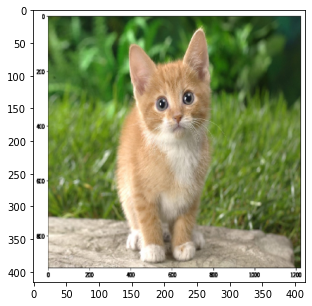

In [96]:
# Slicing blob and transposing to make channels come at the end
blob_to_show = blob[0, :, :, :].transpose(1, 2,0)
print(blob_to_show.shape) 

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.imshow(blob_to_show)
plt.show()

In [97]:
print(blob.shape)

(1, 3, 416, 416)


In [98]:
net.setInput(blob) # giving blob as input to our YOLO Network.
t1=time.time()
output = net.forward(output_layers)
t2 = time.time()

# Showing spent time for forward pass
print('YOLO took {:.5f} seconds'.format(t2-t1))

YOLO took 1.13117 seconds


Successfully done after we kept the dimensions as a multiple of 32

In [99]:
print(output)

[array([[0.03704938, 0.04164451, 0.47051656, ..., 0.        , 0.        ,
        0.        ],
       [0.04379032, 0.03266421, 0.3056888 , ..., 0.        , 0.        ,
        0.        ],
       [0.04629975, 0.03514383, 0.7874075 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9595557 , 0.95662946, 0.53894526, ..., 0.        , 0.        ,
        0.        ],
       [0.9644282 , 0.9644547 , 0.3321379 , ..., 0.        , 0.        ,
        0.        ],
       [0.964044  , 0.9677366 , 0.8706645 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.02005205, 0.02383065, 0.03867296, ..., 0.        , 0.        ,
        0.        ],
       [0.01892688, 0.01688094, 0.4264015 , ..., 0.        , 0.        ,
        0.        ],
       [0.02298477, 0.01750294, 0.06264789, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9752893 , 0.9801012 , 0.0432085 , ..., 0.        , 0.        ,
        0.        ],
       [0.97997534

# These are the output from our YOLO pretrained model..

# Colours for Representing Object:-

In [100]:
colours = np.random.randint(0, 255, size=(len(names), 3), dtype='uint8') # randint(low, high=None, size=None, dtype='l')

print(colours.shape)
print(len(colours))
print(colours[0])  

(80, 3)
80
[ 24 211 221]


Made a list of colours with randomly RGB colour of each class.
Making so that we can distinguish every objects with different colours..

In [101]:
classes = []
confidences = []
boxes = []

In [102]:
Width = image.shape[1]
Height = image.shape[0]

In [103]:
print(Width,Height)

601 453


In [104]:
len(output)

3

In [105]:
for out in output:
    for res in out:
        
#         print(res)
        scores = res[5:]
#         print(scores)
        class_current = np.argmax(scores)

        # Getting confidence (probability) for current object
        confidence_current = scores[class_current]

        # Eliminating weak predictions by minimum probability
        if confidence_current > 0.5:
            # Scaling bounding box coordinates to the initial image size
            # YOLO data format keeps center of detected box and its width and height
            # That is why we can just elementwise multiply them to the width and height of the image
            box_current = res[0:4] * np.array([Width, Height, Width, Height])

            # From current box with YOLO format getting top left corner coordinates
            # that are x_min and y_min
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            # Adding results into prepared lists
            boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            classes.append(class_current)
          

In [106]:
results = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)

# Check point
# Showing labels of the detected objects
for i in range(len(classes)):
    print(names[int(classes[i])])

# Saving found labels
with open('found_labels.txt', 'w') as f:
    for i in range(len(classes)):
        f.write(names[int(classes[i])])

cat


In [118]:
if len(results) > 0:
    # Going through indexes of results
    for i in results.flatten():
        # Getting current bounding box coordinates
        x_min, y_min = boxes[i][0],boxes[i][1]
        box_width, box_height = boxes[i][2], boxes[i][3]

        # Preparing colour for current bounding box
        colour_box_current = [int(j) for j in colours[classes[i]]]

        # Drawing bounding box on the original image
        cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 5)

        # Preparing text with label and confidence for current bounding box
        text_box_current = '{}: {:.4f}'.format(names[int(classes[i])], confidences[i])

        # Putting text with label and confidence on the original image
        cv2.putText(image, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, colour_box_current)

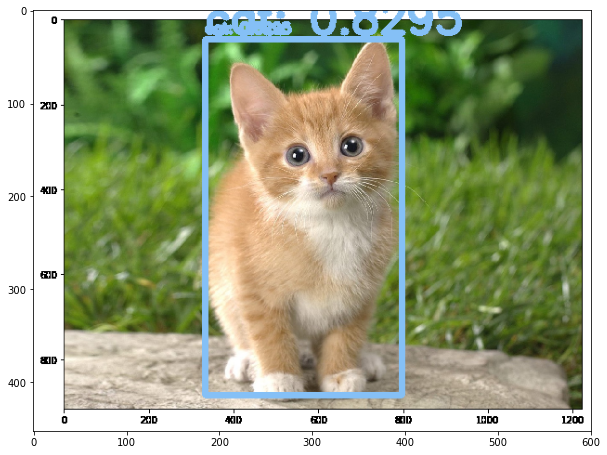

In [119]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()